In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import csv
import pandas as pd
from utility.graph_utility import GraphUtility

In [49]:
# 3folders
from pyrsistent import v


folder01 = "20220804_181051_10dB_0.0-0.5V_8.5-11.0"
filename01 = "20220804_181051_10dB_0.0V.csv"
file_day01 = "20220804_181051_10dB_"
csvname01 = "H:/マイドライブ/RyoyaOhashi/JPA_tools/JPA_Result/csv/" + folder01 + "/" + filename01

folder02 = "20220804_183948_10dB_0.5-1.0V_8.5-11.0"
filename02 = "20220804_183948_10dB_0.5V.csv"
file_day02 = "20220804_183948_10dB_"
csvname02 = "H:/マイドライブ/RyoyaOhashi/JPA_tools/JPA_Result/csv/" + folder02 + "/" + filename02

folder03 = "20220804_190328_10dB_1.0-1.5V_8.5-11.0"
filename03 = "20220804_190328_10dB_1.0V.csv"
file_day03 = "20220804_190328_10dB_"
csvname03 = "H:/マイドライブ/RyoyaOhashi/JPA_tools/JPA_Result/csv/" + folder03 + "/" + filename03

df01 = pd.read_csv(csvname01, header=None, sep=',', usecols=[0,1,2,3,4,5])
all_freq = df01.iloc[17:,1]
freq_start = all_freq.head(1)
freq_end = all_freq.tail(1)
print(all_freq, freq_start, freq_end)

df02 = pd.read_csv(csvname02, header=None, sep=',', usecols=[0,1,2,3,4,5])
df03 = pd.read_csv(csvname03, header=None, sep=',', usecols=[0,1,2,3,4,5])

dB = float(df01.iat[0,5])
print(dB)
minV01 = float(df01.iat[1,5])
maxV01 = float(df01.iat[2,5])
numV01 = int(df01.iat[3,5])

minV02 = float(df02.iat[1,5])
maxV02 = float(df02.iat[2,5])
numV02 = int(df02.iat[3,5])

minV03 = float(df03.iat[1,5])
maxV03 = float(df03.iat[2,5])
numV03 = int(df03.iat[3,5])

v01 = np.linspace(minV01, maxV01, numV01)
v02 = np.linspace(minV02, maxV02, numV02)
v03 = np.linspace(minV03, maxV03, numV03)

v = np.concatenate([v01, v02, v03])
print(minV01, maxV01)
print(minV02, maxV02)
print(minV03, maxV03, v)


17       8.500000000
18       8.501250000
19       8.502500000
20       8.503750000
21       8.505000000
            ...     
2013    10.995000000
2014    10.996250000
2015    10.997500000
2016    10.998750000
2017    11.000000000
Name: 1, Length: 2001, dtype: object 17    8.500000000
Name: 1, dtype: object 2017    11.000000000
Name: 1, dtype: object
10.0
0.0 0.5
0.5 1.0
1.0 1.5 [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.5  0.51 0.52 0.53 0.54
 0.55 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68
 0.69 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82
 0.83 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96
 0.97 0.98 0.99 1.   1.   1.01 1.02 1.03 1.04 1.05 1.06 1.07 1.08 1.09
 1.1  1.11 1.12 1.13 1.14 1.15 1.16 1.17 1.18 1.19

In [50]:
phase = {}
phase01 = {}
phase02 = {}
phase03 = {}

diff = {}
diff01 = {}
diff02 = {}
diff03 = {}

for n in v01:
    # print(m)
    # print(n)
    filename = file_day01 + str(n) + "V.csv"
    csvname1 = "H:/マイドライブ/RyoyaOhashi/JPA_tools/JPA_Result/csv/" + folder01 + "/" + filename 
    phase01[n] = np.loadtxt(csvname1, skiprows=17, usecols=[3], delimiter=',', unpack=True)
# print(phase01)

for n in v02:
    # print(m)
    # print(n)
    filename = file_day02 + str(n) + "V.csv"
    csvname2 = "H:/マイドライブ/RyoyaOhashi/JPA_tools/JPA_Result/csv/" + folder02 + "/" + filename 
    phase02[n] = np.loadtxt(csvname2, skiprows=17, usecols=[3], delimiter=',', unpack=True)

for n in v03:
    # print(m)
    # print(n)
    filename = file_day03 + str(n) + "V.csv"
    csvname3 = "H:/マイドライブ/RyoyaOhashi/JPA_tools/JPA_Result/csv/" + folder03 + "/" + filename 
    phase03[n] = np.loadtxt(csvname3, skiprows=17, usecols=[3], delimiter=',', unpack=True)

phase01.update(phase02)
phase01.update(phase03)
phase = phase01
print(phase)

for i,m in enumerate(v01):
    diff[m] = abs(phase[v01[i]] - phase[v01[i-1]])
    # print(i)
    for l in range(len(diff[m])):
        # print((diff[i])[l])
        if (diff[m])[l] > 180:
            (diff[m])[l] = 360 - (diff[m])[l]
    diff01[m] = diff[m]
# print(diff01)

for i,m in enumerate(v02):
    diff[m] = abs(phase[v02[i]] - phase[v02[i-1]])
    for l in range(len(diff[m])):
        if (diff[m])[l] > 180:
            (diff[m])[l] = 360 - (diff[m])[l]
    diff02[m] = diff[m]

for i,m in enumerate(v03):
    diff[m] = abs(phase[v03[i]] - phase[v03[i-1]])
    for l in range(len(diff[m])):
        if (diff[m])[l] > 180:
            (diff[m])[l] = 360 - (diff[m])[l]
    diff03[m] = diff[m]

diff01.update(diff02)
diff01.update(diff03)
diff= diff01
print(diff)

{0.0: array([-93.59637, -97.78457, -91.48867, ..., -89.74388, -91.06243,
       -90.52762]), 0.01: array([ -98.44083, -103.1542 , -104.4754 , ..., -104.7283 , -105.3521 ,
       -104.2716 ]), 0.02: array([ -94.81862, -101.0247 ,  -99.43433, ..., -143.4898 , -135.6802 ,
       -146.127  ]), 0.03: array([-116.2143 , -108.9953 , -109.8122 , ...,   85.81803,  115.3552 ,
        124.4505 ]), 0.04: array([-107.5204 , -109.9995 , -109.2195 , ...,   72.80869,   94.14261,
         43.16474]), 0.05: array([-102.6786 ,  -96.15945, -108.7188 , ...,   57.0839 ,   76.69034,
         73.0261 ]), 0.06: array([-103.2289 ,  -95.2943 ,  -93.23662, ...,  160.4937 ,  139.0462 ,
        161.6375 ]), 0.07: array([ -99.43335, -102.6721 ,  -93.32439, ..., -138.0868 , -145.0395 ,
       -132.8573 ]), 0.08: array([-105.1184 ,  -98.12952, -100.1373 , ..., -133.3695 , -134.9838 ,
       -142.0009 ]), 0.09: array([-101.2857, -100.5664, -100.2287, ..., -106.8927, -109.3885,
       -106.0639]), 0.1: array([-90.90025,

In [51]:
# v_array = np.array(v)
# print(v_array.dtype)
freq_array =  np.loadtxt(csvname1, skiprows=17, usecols=[1], delimiter=',', unpack=True)
# freq_array = np.array(freq_array, dtype=float)
print(freq_array)

[ 8.5      8.50125  8.5025  ... 10.9975  10.99875 11.     ]


[[ -93.59637  -98.44083  -94.81862 ... -100.9209   -93.08493 -100.8118 ]
 [ -97.78457 -103.1542  -101.0247  ...  -93.72623  -92.47933  -96.8595 ]
 [ -91.48867 -104.4754   -99.43433 ...  -98.14294  -86.47256  -95.74895]
 ...
 [ -89.74388 -104.7283  -143.4898  ...  -86.57337  -88.4697   -88.16907]
 [ -91.06243 -105.3521  -135.6802  ...  -87.00293  -86.28882  -88.48212]
 [ -90.52762 -104.2716  -146.127   ...  -88.54575  -88.04102  -86.68896]]


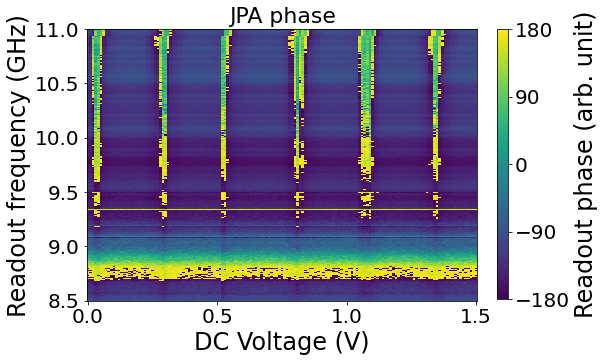

In [52]:
#　位相評価
import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 20
x = v
y = freq_array


X, Y = np.meshgrid(x, y)
# print(X,Y)
Z = np.zeros((len(x), len(y)))
for i in range(len(x)):
    # print(i)
    Z[i] = phase[x[i]]
Z_T = Z.transpose()
print(Z_T)

fig, ax = plt.subplots(1, 1, figsize=(7,5))

hoge00 = ax.pcolormesh(X, Y, Z_T, vmin=-180, vmax=180)
hoge00.set_clim(-180, 180)
cax = plt.axes([0.94, 0.13, 0.02, 0.75]) #[左端からの距離, 下端からの距離, 太さ, 長さ]
cbar = plt.colorbar(hoge00, cax=cax, ticks=[-180, -90, 0, 90, 180])
# cbar = fig.colorbar(ticks=[-180, -90, 0, 90, 180])

ax.set_title("JPA phase", size=22)
ax.set_xlabel('DC Voltage (V)', size=24)
ax.set_ylabel('Readout frequency (GHz)', size=24)
cbar.set_label("Readout phase (arb. unit)", size=24) #カラーバーのラベル


plt.show()
del plt


[[ 1.17434  4.84446  3.62221 ...  8.19725  7.83597  7.72687]
 [ 5.93121  5.36963  2.1295  ...  0.6578   1.2469   4.38017]
 [ 3.07671 12.98673  5.04107 ...  2.13928 11.67038  9.27639]
 ...
 [ 6.8183  14.98442 38.7615  ...  1.21824  1.89633  0.30063]
 [ 6.12687 14.28967 30.3281  ...  0.71051  0.71411  2.1933 ]
 [ 5.50173 13.74398 41.8554  ...  0.87849  0.50473  1.35206]]


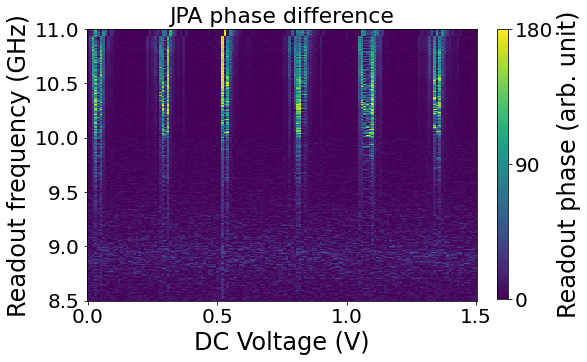

In [53]:
# 差分評価
import matplotlib.pyplot as plt
from numpy import size
plt.rcParams["font.size"] = 20
x = v
y = freq_array


X, Y = np.meshgrid(x, y)
# print(X,Y)
Z = np.zeros((len(x), len(y)))
for i in range(len(x)):
    Z[i] = diff[x[i]]
Z_T = Z.transpose()
print(Z_T)

fig, ax = plt.subplots(1, 1, figsize=(7,5))

hoge00 = ax.pcolormesh(X, Y, Z_T, vmin=-180, vmax=180)
hoge00.set_clim(0, 180)
cax = plt.axes([0.94, 0.13, 0.02, 0.75]) #[左端からの距離, 下端からの距離, 太さ, 長さ]
cbar = plt.colorbar(hoge00, cax=cax, ticks=[0, 90, 180])
# cbar = plt.colorbar(hoge00, cax=cax, ticks=[-180, -90, 0, 90, 180])
# cbar = fig.colorbar(ticks=[-180, -90, 0, 90, 180])

ax.set_title("JPA phase difference", size=22)
ax.set_xlabel('DC Voltage (V)', size = 24)
ax.set_ylabel('Readout frequency (GHz)', size = 24)
cbar.set_label("Readout phase (arb. unit)", size = 24) #カラーバーのラベル


plt.show()
del plt


In [26]:
v_array = np.array(v)
print(v_array.dtype)
freq_array =  np.loadtxt(csvname, skiprows=17, usecols=[3], delimiter=',', unpack=True)
# freq_array = np.array(freq_array, dtype=float)
print(freq_array.dtype)

float64
float64


[171.002   175.1801  176.1786  ...  88.43862  95.02953  97.06135]


c:\Users\super\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

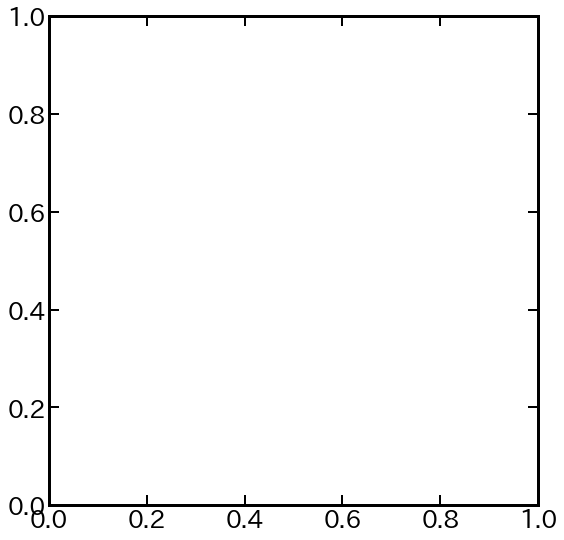

In [5]:
# カラーマップを作成する 河合カラーマップ変形
gamma = 10.0
v_vertical = 1.0
# t_array = np.linspace(-1.0, 1.0, 1001)
v_array = np.array(v, dtype=float)
# v_parallel_array = np.linspace(-1.0, 1.0, 1001)
freq_array =  np.loadtxt(csvname, skiprows=17, usecols=[3], delimiter=',', unpack=True)
freq_array = np.array(freq_array, dtype=float)
print(freq_array)
v_array, freq_array = np.meshgrid(v_array, freq_array)  # 配列の要素から格子列
p_array = (
    1.0
    - np.square(
        np.cos(
            gamma
            * v_array
            * np.sqrt(np.square(freq_array) + np.square(v_vertical))
        )
    )
    - (
        np.square(freq_array)
        / (np.square(freq_array) + np.square(v_vertical))
    )
    * np.square(
        np.sin(
            gamma
            * v_array
            * np.sqrt(np.square(freq_array) + np.square(v_vertical))
        )
    )
)
graph = GraphUtility()  # GraphUtilityのインスタンスの作成
graph.make_color_map(
    p_array, x_axis_min=minV, x_axis_max=maxV, y_axis_min=freq_start, y_axis_max=freq_end
)  # カラーマップを作成
graph.show()  # グラフを表示する
del graph  # インスタンスを削除する


[[-1.    -0.998 -0.996 ...  0.996  0.998  1.   ]
 [-1.    -0.998 -0.996 ...  0.996  0.998  1.   ]
 [-1.    -0.998 -0.996 ...  0.996  0.998  1.   ]
 ...
 [-1.    -0.998 -0.996 ...  0.996  0.998  1.   ]
 [-1.    -0.998 -0.996 ...  0.996  0.998  1.   ]
 [-1.    -0.998 -0.996 ...  0.996  0.998  1.   ]] 1001


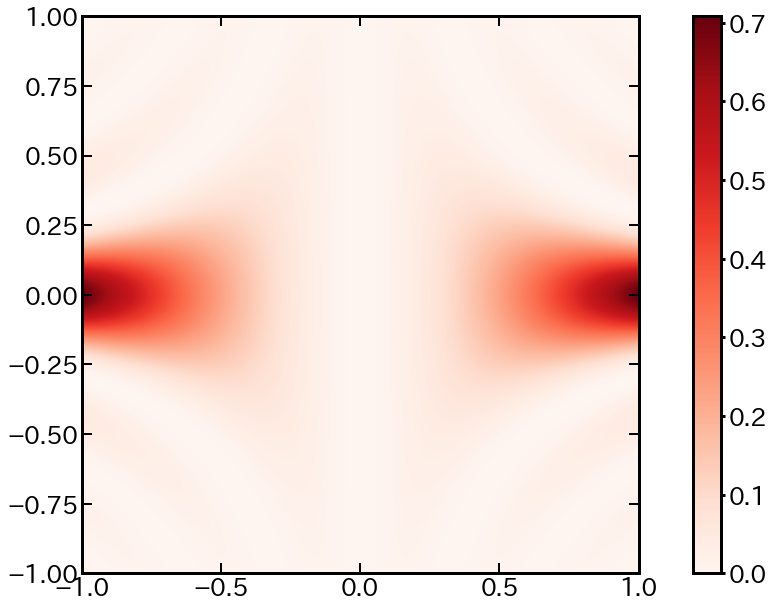

In [5]:
# カラーマップを作成する 河合マップ原型
gamma = 10.0
v_vertical = 0.1
t_array = np.linspace(-1.0, 1.0, 1001)
v_parallel_array = np.linspace(-1.0, 1.0, 1001)
t_array, v_parallel_array = np.meshgrid(t_array, v_parallel_array)  # 配列の要素から格子列
print(t_array, len(t_array))
p_array = (
    1.0
    - np.square(
        np.cos(
            gamma
            * t_array
            * np.sqrt(np.square(v_parallel_array) + np.square(v_vertical))
        )
    )
    - (
        np.square(v_parallel_array)
        / (np.square(v_parallel_array) + np.square(v_vertical))
    )
    * np.square(
        np.sin(
            gamma
            * t_array
            * np.sqrt(np.square(v_parallel_array) + np.square(v_vertical))
        )
    )
)
graph = GraphUtility()  # GraphUtilityのインスタンスの作成
graph.make_color_map(
    p_array, x_axis_min=-1.0, x_axis_max=1.0, y_axis_min=-1.0, y_axis_max=1.0
)  # カラーマップを作成
graph.show()  # グラフを表示する
del graph  # インスタンスを削除する
